In [2]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Path saving 
gene_eq_path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'


In [4]:
plot_dir = '/cluster/work/grlab/projects/projects2020_OHSU/plots'
plot_dir = os.path.join(plot_dir, 'MS_single_sample_plots')
os.mkdir(plot_dir)
base_plot = 'v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA'

FileExistsError: [Errno 17] File exists: '/cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots'

In [5]:
print(plot_dir)

/cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots


In [6]:
# Read intermediate file 
df_plot = pd.read_csv(os.path.join(gene_eq_path, 'exp_427_kmers_plot2.csv.gz'), #exp_427_kmers_plot
                      compression = 'gzip' )

In [7]:
df_plot.head(100)

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,peptide,sample,...,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all,...,0.0,0.0,6.0,0.0,0.0,3.0,True,0.0,0,970
1,2,0,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all,...,0.0,0.0,6.0,0.0,0.0,3.0,True,0.0,0,970
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP,TCGABHA18V01A11RA12D07all,...,72.0,28.0,156.0,164.0,112.0,651.0,True,1.0,0,1100
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,TCGABHA18V01A11RA12D07all,...,0.0,1.0,2.0,1.0,0.0,4.0,True,1.0,0,972
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,TCGABHA18V01A11RA12D07all,...,0.0,1.0,2.0,1.0,0.0,4.0,True,1.0,0,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100,1,0,0,1,ENSG00000011304.20,805516_805555,AAFASPQAA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,TCGABHA18V01A11RA12D07all,...,0.0,0.0,0.0,0.0,0.0,0.0,True,1.0,0,1
96,102,58,0,0,1,ENSG00000011304.20,805187_805512,AAFASPQAA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,TCGABHA18V01A11RA12D07all,...,0.0,0.0,0.0,0.0,0.0,0.0,True,1.0,0,1
97,102,1,0,0,1,ENSG00000011304.20,805516_805555,AAFASPQAA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,TCGABHA18V01A11RA12D07all,...,0.0,0.0,0.0,0.0,0.0,0.0,True,1.0,0,1
98,104,49,0,0,1,ENSG00000144674.16,37302332_37315419,AAFEELEKT,GMVIAETKRQMHETLEMKEEEIAQLRSRIKQMTTQGEELREQKEKS...,TCGABHA18V01A11RA12D07all,...,0.0,0.0,0.0,0.0,0.0,0.0,True,1.0,0,1


In [8]:
# TEST 
grp = df_plot.groupby(['>pepID',
 "includes_5'",
 "includes_3'",
 'gene',
 'kmer',
 'peptide',
 'sample',
 'percentile_rank',
 'affinity',
 'strand',
 'GTEX_presence',
 'index',
 'isCrossJunction',
 'recurrence']).count()

grp = grp.loc[grp['jx_pos'] == 2 , :]

grp = grp.reset_index()

test = df_plot.set_index('>pepID')

test = test.loc[grp['>pepID']]

test =test.drop_duplicates() # 3 exons only 

In [9]:
# TEST 
# kmers from 3 exon derived peptides
test.loc[test['sample'] == 'TCGABHA18V01A11RA12D07all', 'kmer'].unique() 

array(['AGNYRRHPV', 'AGPVPWCWA', 'AIRKQKRHL', 'AKKRMRRPQ', 'AKKRMRSKP',
       'AQKGVNLGT', 'AQKLWMRCW', 'ARMLPWLEC', 'ARMLPWQSC', 'ATLPRRAVT',
       'CLPPASVAI', 'CMARMLPWL', 'CMARMLPWQ', 'CPGGLLRPW', 'CWTKSGAST',
       'DAQKGVNLG', 'DLCPGGLLR', 'DVLVPLAPR', 'EEQELLEYP', 'EEQLASLHT',
       'EHRQRRAAS', 'ELSKTIRHT', 'EQELLEYPL', 'ERMQDAESS', 'ESIVELPSV',
       'EVFTTRFCG', 'FRELSKTIR', 'FTTRFCGYY', 'GEHRQRRAA', 'GGVYHPLLW',
       'GKSPITSGA', 'GNYRRHPVK', 'GPSRESVEP', 'GPVPWCWAA', 'GVDDGPALR',
       'GVYHPLLWL', 'HILLFSLGL', 'HPLLWLLHG', 'HRMNLLLSC', 'HRMNLLLVL',
       'HWGASLHSI', 'IFTRGNCKK', 'IFTRGPSRR', 'IFTRGSAWP', 'IFTRGSTRP',
       'IKNSKLEGA', 'IRKQKRHLQ', 'KGVNLGTIT', 'KKMASRKEA', 'KLWMRCWSS',
       'KMASRKEAH', 'KSGPSRESV', 'KVMEVASGL', 'LAFYLAKKK', 'LCPGGLLRP',
       'LHWGASLHS', 'LLLSCHLCQ', 'LLLVLDPSQ', 'LPPASVAIT', 'LRGVDDGPA',
       'LVPLAPRVK', 'LVRLQYQMR', 'MARMLPWLE', 'MARMLPWQS', 'MNLLLSCHL',
       'MNLLLVLDP', 'MPIFRNCKK', 'MPIFTRGNC', 'MPIFTRGPS', 'MPIF

In [5]:
# Some type conversions
# df_plot['junctionAnnotated'] = df_plot['junctionAnnotated'].astype(str)
# df_plot['readFrameAnnotated'] = df_plot['readFrameAnnotated'].astype(str)

In [11]:
# Annotate MHC
df_plot['MHC-I binding status'] = 'not computed'

df_plot.loc[df_plot['percentile_rank'] <=2 ,
            'MHC-I binding status'] = 'strong binder'
df_plot.loc[ (10 >= df_plot['percentile_rank']) &
              (df_plot['percentile_rank'] > 2), 
            'MHC-I binding status'] = 'weak binder'
df_plot.loc[ 10 < df_plot['percentile_rank'] ,
            'MHC-I binding status'] = 'not binder'

In [12]:
df_plot.columns

Index(['>pepID', 'jx_pos', 'between_codons', 'includes_5'', 'includes_3'',
       'gene', 'jx_coord', 'kmer', 'peptide', 'sample',
       ...
       'TCGAWTAB4401A11RA41B07all', 'TCGAXXA89901A11RA36F07all',
       'TCGAXXA89A01A11RA36F07all', 'TCGAZ7A8R501A42RA41B07all',
       'TCGAZ7A8R601A11RA41B07all', 'isCrossJunction',
       'junctionAnnotated_kmer', 'readFrameAnnotated_kmer', 'recurrence',
       'MHC-I binding status'],
      dtype='object', length=1122)

In [13]:
meta_cols = [ col for col in df_plot.columns if 'TCGA' not in col ] 
cohort = [ col for col in df_plot.columns if 'TCGA' in col ] 

In [14]:
meta_cols

['>pepID',
 'jx_pos',
 'between_codons',
 "includes_5'",
 "includes_3'",
 'gene',
 'jx_coord',
 'kmer',
 'peptide',
 'sample',
 'percentile_rank',
 'affinity',
 'strand',
 'GTEX_presence',
 'index',
 'isCrossJunction',
 'junctionAnnotated_kmer',
 'readFrameAnnotated_kmer',
 'recurrence',
 'MHC-I binding status']

# Exploration 

### All 

number of kmers 29887


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

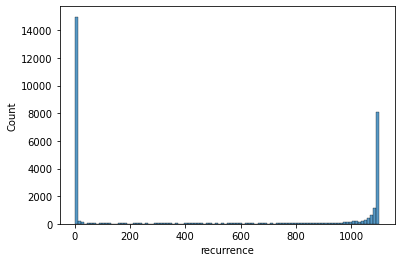

In [15]:
tmp = df_plot.loc[
                    (df_plot['recurrence'] > 0),
                  ['recurrence', 'kmer', 'GTEX_presence' ]].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

### Remove if present in GTEX Graph  

number of kmers 9047


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

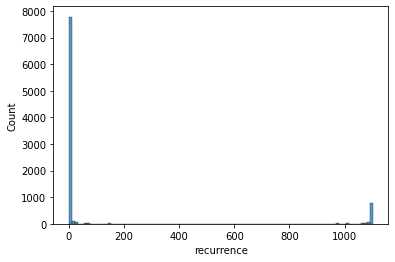

In [17]:
tmp = df_plot.loc[df_plot['GTEX_presence'] == 0
                   & (df_plot['recurrence'] > 0),
                  ['recurrence', 'kmer', 'GTEX_presence' ]].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

### Remove if kmer comes from an annotated junction (or on the same 3-exon peptide)

In [18]:
df_plot['junctionAnnotated_kmer'].unique()

array([0., 1.])

number of kmers 4001


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

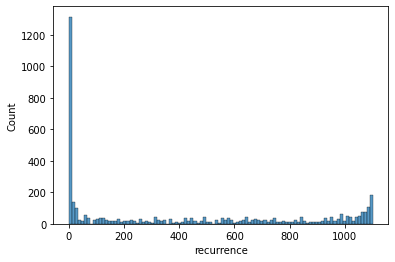

In [19]:
tmp = df_plot.loc[df_plot['junctionAnnotated_kmer'] == 0
                   & (df_plot['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

In [22]:
df_plot['junctionAnnotated'].unique()

KeyError: 'junctionAnnotated'

In [23]:
tmp = df_plot.loc[((df_plot['junctionAnnotated'] == '0') | 
                   (df_plot['junctionAnnotated'] == '0/nan') ) &
                   (df_plot['recurrence'] > 0) &
                  (df_plot['GTEX_presence'] == 0) , 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

KeyError: 'junctionAnnotated'

### Remove if kmer comes from an annotated junction (or on the same 3-exon peptide) 
### Remove GTEX junctions with graph 

number of kmers 1398


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

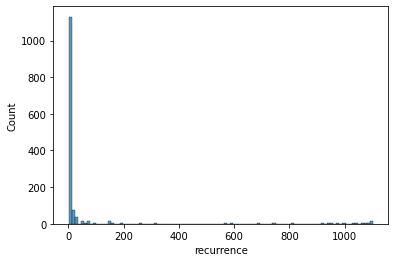

In [24]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

number of kmers 1244


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

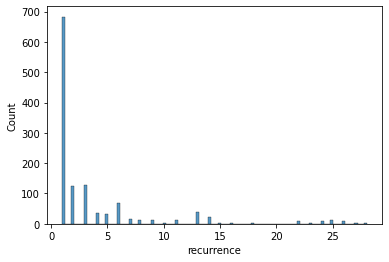

In [25]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] < 30), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

number of kmers 280


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

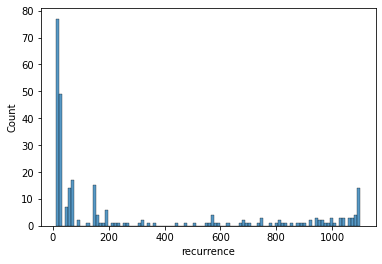

In [85]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 10), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

In [27]:
tmp

,recurrence,kmer
1,970,AAAALQQHS
125,146,AAGGLHGEF
179,944,AALARWRAN
180,76,AALLLGAPH
421,1068,ACKVIVTTG
...,...,...
75385,195,WTIGDDQDL
76096,810,YHPNPASVS
76198,49,YKIYRWTLA
76829,49,YRWTLAQPP


In [86]:
## DEBUG: high recurrence, junction non annotated, not in GTEX
remaining_recurrenct = df_plot.merge(tmp, on = 'kmer', how = 'right')

## DEBUG: high recurrence, junction non annotated, not in GTEX
## Look if they come from >1 junction position 
## (bug in Andy files, = bug in junction annotated) 

remaining_recurrenct2 = pd.DataFrame.from_records(
    remaining_recurrenct.groupby(['kmer',  'jx_pos']).count().index)

display(remaining_recurrenct2.head())

remaining_recurrenct3 = remaining_recurrenct2.groupby([0]).count().reset_index().rename(
    {0:'kmer', 1:'number_jx_pos'}, axis = 1)

remaining_recurrenct3 = remaining_recurrenct3.loc[
    remaining_recurrenct3['number_jx_pos'] == 1, :]

remaining_recurrenct3 = df_plot.merge(remaining_recurrenct3, on = 'kmer', how = 'right')

display(remaining_recurrenct3.head())
display(remaining_recurrenct3.shape)
display(remaining_recurrenct3['jx_coord'].unique().shape)

(array([2490.,  240.,  180.,    0.,   15.,    0.,   15.,    0.,    0.,
          60.]),
 array([ 11. ,  84.9, 158.8, 232.7, 306.6, 380.5, 454.4, 528.3, 602.2,
        676.1, 750. ]),
 <BarContainer object of 10 artists>)

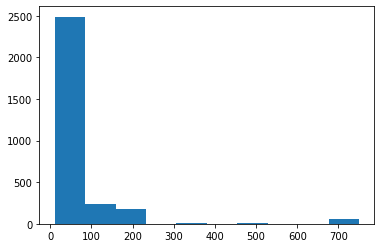

In [91]:
plt.hist(remaining_recurrenct3['recurrence'])

In [103]:
remaining_recurrenct3.loc[(remaining_recurrenct3['recurrence'] > 300 ) & 
                          ((remaining_recurrenct3['TCGABHA18V01A11RA12D07all'] > 0) | 
                          (remaining_recurrenct3['TCGAC8A12P01A11RA11507all'] > 0) | 
                          (remaining_recurrenct3['TCGAAOA0JM01A21RA05607all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0SX01A12RA08407all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0D201A21RA03407all'] > 0) ) , :]

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,peptide,sample,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,MHC-I binding status,number_jx_pos
645,17036,33,0,0,1,ENSG00000147459.18,25411294_25411837,FNGDWLLSG,LAPPLPVRREAKAPPPPPPKARKSGIPTSEPGSQKRTHIFNGDWLL...,TCGABHA18V01A11RA12D07all,...,0.0,0.0,0.0,0.0,True,0.0,0,312,not binder,1
646,99664,33,0,0,1,ENSG00000147459.18,25411294_25411837,FNGDWLLSG,LAPPLPVRREAKAPPPPPPKARKSGIPTSEPGSQKRTHIFNGDWLL...,TCGABHA18V01A11RA12D07all,...,0.0,0.0,0.0,0.0,True,0.0,0,312,not binder,1
647,182292,33,0,0,1,ENSG00000147459.18,25411294_25411837,FNGDWLLSG,LAPPLPVRREAKAPPPPPPKARKSGIPTSEPGSQKRTHIFNGDWLL...,TCGABHA18V01A11RA12D07all,...,0.0,0.0,0.0,0.0,True,0.0,0,312,not binder,1
648,17036,33,0,0,1,ENSG00000147459.18,25411294_25411837,FNGDWLLSG,LAPPLPVRREAKAPPPPPPKARKSGIPTSEPGSQKRTHIFNGDWLL...,TCGAC8A12P01A11RA11507all,...,0.0,0.0,0.0,0.0,True,0.0,0,312,not computed,1
649,99664,33,0,0,1,ENSG00000147459.18,25411294_25411837,FNGDWLLSG,LAPPLPVRREAKAPPPPPPKARKSGIPTSEPGSQKRTHIFNGDWLL...,TCGAC8A12P01A11RA11507all,...,0.0,0.0,0.0,0.0,True,0.0,0,312,not computed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,150603,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,VTSPGPEHPEGGQGCDSGSAEQHSPAWDGWNRPGLLTPQPLKPLAV...,TCGAA2A0SX01A12RA08407all,...,3.0,1.0,0.0,0.0,True,0.0,0,480,not computed,1
2351,233231,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,VTSPGPEHPEGGQGCDSGSAEQHSPAWDGWNRPGLLTPQPLKPLAV...,TCGAA2A0SX01A12RA08407all,...,3.0,1.0,0.0,0.0,True,0.0,0,480,not computed,1
2352,67975,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,VTSPGPEHPEGGQGCDSGSAEQHSPAWDGWNRPGLLTPQPLKPLAV...,TCGAA2A0D201A21RA03407all,...,3.0,1.0,0.0,0.0,True,0.0,0,480,weak binder,1
2353,150603,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,VTSPGPEHPEGGQGCDSGSAEQHSPAWDGWNRPGLLTPQPLKPLAV...,TCGAA2A0D201A21RA03407all,...,3.0,1.0,0.0,0.0,True,0.0,0,480,weak binder,1


In [112]:
remaining_recurrenct3.loc[(remaining_recurrenct3['recurrence'] > 300 ) & 
                          ((remaining_recurrenct3['TCGABHA18V01A11RA12D07all'] > 0) | 
                          (remaining_recurrenct3['TCGAC8A12P01A11RA11507all'] > 0) | 
                          (remaining_recurrenct3['TCGAAOA0JM01A21RA05607all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0SX01A12RA08407all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0D201A21RA03407all'] > 0) ) , 
                          ['recurrence', 'jx_coord', 'gene', 'kmer', 'peptide']].drop_duplicates()


,recurrence,jx_coord,gene,kmer,peptide
645,312,25411294_25411837,ENSG00000147459.18,FNGDWLLSG,LAPPLPVRREAKAPPPPPPKARKSGIPTSEPGSQKRTHIFNGDWLL...
1230,750,77056084_77055380,ENSG00000118816.10,LKFHAIAVN,RIPVLKFHAIAVNSEDPCLLWPWLVWKWRNSFLIGFLLQLNCFRKH
1231,750,77055362_77055253,ENSG00000118816.10,LKFHAIAVN,RIPVLKFHAIAVNSEDPCLLWPWLVWKWRNSFLIGFLLQLNCFRKH
1232,750,77056084_77055380,ENSG00000118816.10,LKFHAIAVN,RIPVLKFHAIAVNSEDPC
1233,750,77055362_77055253,ENSG00000118816.10,LKFHAIAVN,RIPVLKFHAIAVNSEDPC
2340,480,50221518_50221445,ENSG00000128159.12,SPQSGSLGR,VTSPGPEHPEGGQGCDSGSAEQHSPAWDGWNRPGLLTPQPLKPLAV...


In [99]:
remaining_recurrenct3.shape

(3000, 1123)

In [98]:
# remaining_recurrenct3.to_csv(
#     os.path.join(gene_eq_path, 
#                  'exp-427_novel-pep_jx-non-annotated_jx-not-GTEX_recurrence-min-10.csv'), 
#     index = None)
# print(gene_eq_path)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_conf2_annotFrame_cap0_runs/TCGA_Breast_1102


# Figure1 

In [231]:
recurrence_max = 30
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] <= recurrence_max ), 
                  ['recurrence', 'kmer', 'GTEX_presence'] + cohort ].drop_duplicates()
print('number of kmers', tmp.shape[0])


number of kmers 1244


In [232]:
tmp[tmp == 0] = np.nan
means = np.nanmean(tmp.loc[:, cohort], axis=1)
medians = np.nanmedian(tmp.loc[:, cohort], axis=1)

In [233]:
tmp['mean_exp'] = means
tmp['median_exp'] = medians

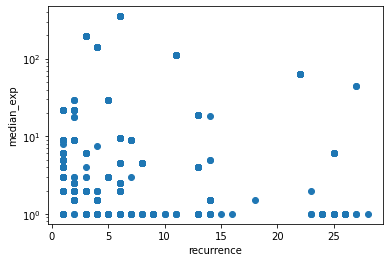

In [234]:
plt.scatter(tmp['recurrence'], tmp['median_exp'])
plt.xlabel('recurrence')
plt.ylabel('median_exp')
plt.yscale("log")  
#plt.ylim([0.1, max(tmp['median_exp'])])

number of kmers 1244
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_recurrence_expression.pdf


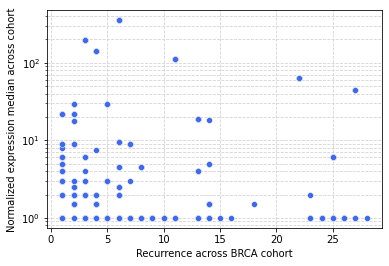

In [239]:
#plt.grid(True, which='both', color='lightgrey')
ax = sns.scatterplot(data = tmp, x = 'recurrence', y= 'median_exp', 
                #, hue = 'readFrameAnnotated'
               edgecolors = 'black', 
               facecolors='royalblue')
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgrey', linestyle='dashed', which='both')
ax.xaxis.grid(color='lightgrey', linestyle='dashed', which='both')
print('number of kmers', tmp.shape[0])
plt.xlabel('Recurrence across BRCA cohort')
plt.ylabel('Normalized expression median across cohort')
plt.yscale("log")  

#plt.ylim([0.1, max(tmp['median_exp'])])

save = False
suffix = 'recurrence_expression'
save_path = os.path.join(plot_dir, f'{base_plot}_{suffix}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
plt.show()

# Figure 2

In [207]:
recurrence_max = 30 
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] <= recurrence_max ) &
                  (df_plot['MHC-I binding status'] != 'not computed'), 
                  ['recurrence', 'kmer', 'GTEX_presence', 
                  'MHC-I binding status', 
                  'percentile_rank', 
                  ] + cohort ].drop_duplicates()
print(tmp.shape)

(883, 1107)


(array([187.,  63.,  20.,  12.,  56.,   1.,   1.,   0.,  10.,  15.]),
 array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ]),
 <BarContainer object of 10 artists>)

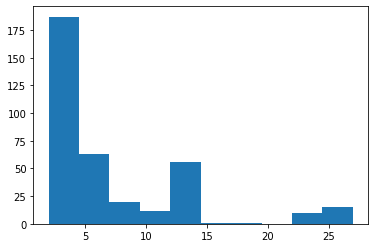

In [213]:
plt.hist(tmp.loc[tmp['recurrence'] > 1, 'recurrence'])

number of kmers 883
number of kmers 883


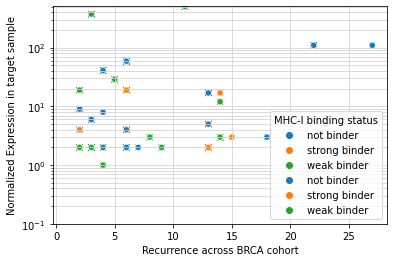

In [57]:
markers = ['x', 'o']
for idx, sample in enumerate(['TCGAC8A12P01A11RA11507all', 'TCGAC8A12P01A11RA11507all']):
    # here subset to sample 
    # check expression > 0 in sample
    # add the name of the sample to the MHC binding status rename
    ax = sns.scatterplot(data = tmp, x = 'recurrence', y = 'TCGAC8A12P01A11RA11507all', 
                    hue = 'MHC-I binding status',
                   marker = markers[idx])
    print('number of kmers', tmp.shape[0])
    plt.xlabel('Recurrence across BRCA cohort')
    plt.ylabel('Normalized Expression in target sample')
    plt.yscale("log")  
    plt.grid(True, which='both', color='lightgrey')
    plt.ylim([0.1, max(tmp[sample])])
    
save = False
save_path = os.path.join(plot_dir, f'{base_plot}_{'recurrence_expression_binding'}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [58]:
l = ax.get_legend_handles_labels()

In [59]:
l

([<matplotlib.collections.PathCollection at 0x2b645066fcd0>,
 ['not binder',
  'strong binder',
  'weak binder',
  'not binder',
  'strong binder',
  'weak binder'])

 Remark, did not compute the binding for the kmers which had expression < 2 in first pass

In [305]:
tmp.loc[tmp['MHC-I binding status'] == 'not computed', 'TCGAC8A12P01A11RA11507all'].describe()


count    318.000000
mean       2.119497
std        6.289910
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      110.000000
Name: TCGAC8A12P01A11RA11507all, dtype: float64

# Figure 3 

In [218]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] <= recurrence_max ) &
                  (df_plot['MHC-I binding status'] != 'not computed'), 
                  ['recurrence', 'kmer', 'GTEX_presence', 
                  'MHC-I binding status', 'gene',
                  'percentile_rank', 
                  ] + cohort ].drop_duplicates()

In [219]:
tmp.shape

(883, 1108)

In [220]:
tmp = pd.melt(tmp, id_vars=['gene', 'kmer'], value_vars=cohort, 
             value_name='Normalized RNA expression of junction', 
             var_name='sample')

In [221]:
tmp.shape

(973066, 4)

In [222]:
tmp.head()

,gene,kmer,sample,Normalized RNA expression of junction
0,ENSG00000060339.14,AAALQQHSS,TCGA3CAAAU01A11RA41B07all,0.0
1,ENSG00000075461.6,AAATQDLKE,TCGA3CAAAU01A11RA41B07all,0.0
2,ENSG00000075461.6,AAATQTLAV,TCGA3CAAAU01A11RA41B07all,0.0
3,ENSG00000137106.18,AAEGDVVDV,TCGA3CAAAU01A11RA41B07all,0.0
4,ENSG00000135413.9,AAKPNEEIS,TCGA3CAAAU01A11RA41B07all,0.0


In [223]:
# launch overnight 1/3 in 40 minutes
expr1 = []
expr2 = []
expr3 = []
thres1 = 0 
thres2 = 10
thres3 = 100
for idx, sample in enumerate(cohort):
    print(idx)
    tmp1 = tmp.loc[(tmp['sample'] == sample) & 
                   tmp['Normalized RNA expression of junction'] > thres1 , 
                   : ].drop_duplicates()
    expr1.append(tmp1.shape[0])
    
    tmp2 = tmp1.loc[tmp1['Normalized RNA expression of junction'] > thres2 , 
                   : ].drop_duplicates()
    expr2.append(tmp2.shape[0])
    
    tmp3 = tmp2.loc[tmp2['Normalized RNA expression of junction'] > thres3 , 
                   : ].drop_duplicates()
    expr3.append(tmp3.shape[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [224]:
sample_kmer_plot = pd.DataFrame({f'Normalized RNA expression > {thres1}':expr1, 
              f'Normalized RNA expression > {thres2}':expr2, 
              f'Normalized RNA expression > {thres3}':expr3})

In [225]:
sample_kmer_plot.head()

,Normalized RNA expression > 0,Normalized RNA expression > 10,Normalized RNA expression > 100
0,8,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [226]:
# sample_kmer_plot.to_csv(os.path.join(gene_eq_path, 'tmp_sample_count_pot.csv.gz'), 
#                       compression = 'gzip', index = None )

number of kmers 973066
number of kmers 973066
number of kmers 973066
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_sample_kmer_nb_recurrence30.pdf


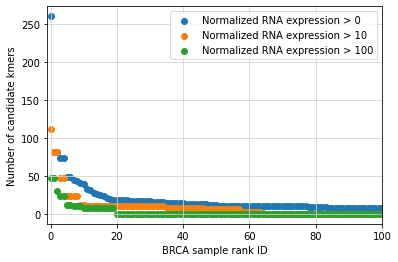

In [230]:
plt.grid(True, which='both', color='lightgrey')
max_val = np.max(sample_kmer_plot.values) + 1
#plt.yscale("log")  
# plt.ylim([0.1,max_val])
plt.xlim(-1, 100)
#plt.semilogy(basey=10)
for idx, col in enumerate(sample_kmer_plot.columns):
    X = np.arange(sample_kmer_plot.shape[0])
    Y = np.sort(sample_kmer_plot[col])[::-1]
    ax = plt.scatter(X, Y, label = col, 
                    marker = 'o')
    print('number of kmers', tmp.shape[0])
    plt.ylabel('Number of candidate kmers')
    plt.xlabel('BRCA sample rank ID')
plt.legend()




save = False
suffix = 'sample_kmer_nb'
rec = 'recurrence30'
save_path = os.path.join(plot_dir, f'{base_plot}_{suffix}_{rec}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [326]:
# tmp['Number kmers expressed in sample'] = 0 
# for idx, sample in enumerate(cohort):
#     print(idx)
#     vals =  df_plot.loc[ : , ['kmer', sample]].drop_duplicates()
#     vals = vals[sample].values
#     tmp.loc[tmp['sample'] == sample, 
#             'Number kmers expressed in sample'] = len(np.where(vals > 0 )[0])
#     tmp.loc[tmp['sample'] == sample, 
#             'Number kmers expressed > 10 in sample'] = len(np.where(vals > 10 )[0])
#     tmp.loc[tmp['sample'] == sample, 
#             'Number kmers expressed > 100 in sample'] = len(np.where(vals > 100 )[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


KeyboardInterrupt: 

In [ ]:
# tmp = pd.melt(df_plot, id_vars=['gene', 'kmer', 'sample'], 
#               value_vars=['Number kmers expressed in sample', 
#                           'Number kmers expressed > 10 in sample',
#                           'Number kmers expressed > 100 in sample']
#              value_name='Candidate kmers per cancer sample', 
#              var_name='Expression level')

In [316]:
tmp.head()

,gene,kmer,sample,Normalized RNA expression of junction,Number kmers expressed in sample
0,ENSG00000060339.14,AAAALQQHS,TCGA3CAAAU01A11RA41B07all,4.0,12218
1,ENSG00000060339.14,AAAALQQHS,TCGA3CAAAU01A11RA41B07all,4.0,12218
2,ENSG00000119333.11,AAADGVLSV,TCGA3CAAAU01A11RA41B07all,243.0,12218
3,ENSG00000119333.11,AAADGWTMG,TCGA3CAAAU01A11RA41B07all,2.0,12218
4,ENSG00000119333.11,AAADGWTMG,TCGA3CAAAU01A11RA41B07all,2.0,12218


# Figure 4 

In [ ]:
meta_cols = [ col for col in df_plot.columns if 'TCGA' not in col ] 


In [ ]:
recurrence_max = 30 
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] <= recurrence_max ) &
                  (df_plot['MHC-I binding status'] != 'not computed'), 
                  ['recurrence', 'kmer', 'GTEX_presence', 
                  'MHC-I binding status', 
                  'percentile_rank', 
                   'sample'
                  ] + cohort ].drop_duplicates()
print(tmp.shape)

In [ ]:
meta_cols

In [ ]:
tmp.head()

In [ ]:
markers = ['^', 'o', 's', 'X', 'd']
all_tmp_plots = []
for idx, sample in enumerate(samples):
    print(sample)
    sample_short = ''.join(sample.split('.')[:-1])
    sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
    sample_nice = '_'.join(sample_short.split('-')[0:3])
    sample_pool = sample.replace('-', '').replace('.', '')

    tmp_plot = tmp.loc[(tmp['sample'] == sample_pool) &
                       (tmp[sample_pool] > 0 ), :]
    new_name = 'MHC-I binding status {}'.format('')
    tmp_plot = tmp_plot.rename({'MHC-I binding status':
                               new_name}, axis = 1)
    
    all_tmp_plots.append(tmp_plot)
    print(tmp_plot.shape)
    if len(tmp_plot):
        ax = sns.swarmplot(data = tmp_plot, x = 'recurrence', y = sample_pool, 
                        hue = new_name, marker = markers[idx], 
                          # jitter = 2
                          palette = ['b', 'grey', 'r'])



plt.xlabel('Recurrence across BRCA cohort')
plt.ylabel('Normalized Expression in target sample')
#plt.yscale("log")  
# plt.grid(True, which='both', color='lightgrey')
ax.xaxis.grid(color='lightgrey', linestyle='dashed', which='both')
#plt.ylim([0.1, max(tmp[sample])])
#plt.xlim([0, 30])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3])
    
save = False
suffix = 'recurrence_expression_binding'
save_path = os.path.join(plot_dir, f'{base_plot}_{suffix}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
plt.show()